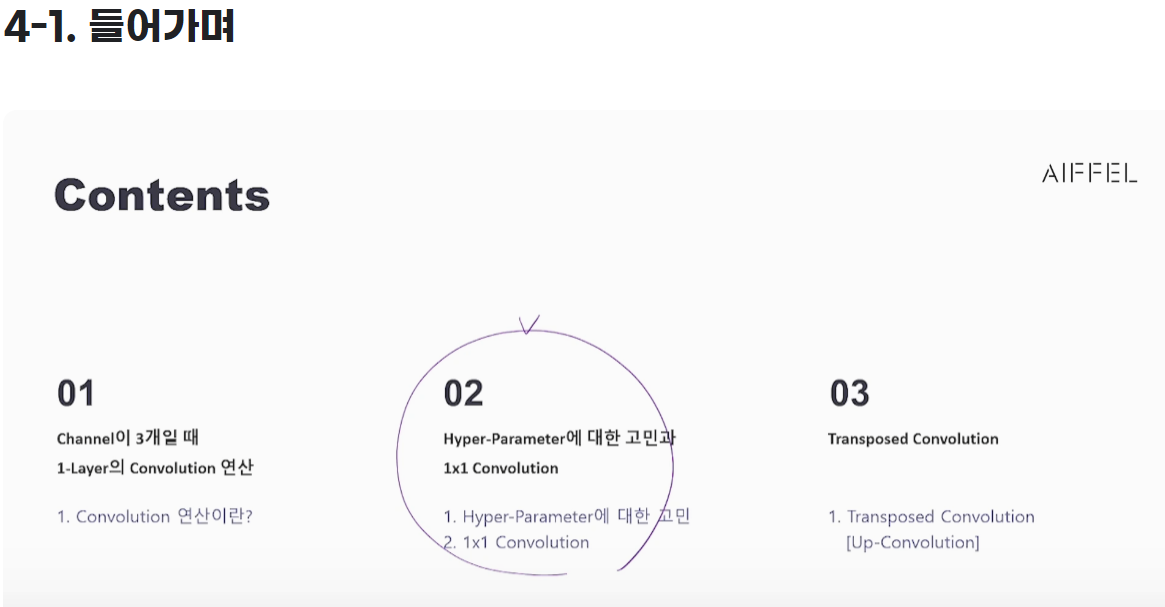

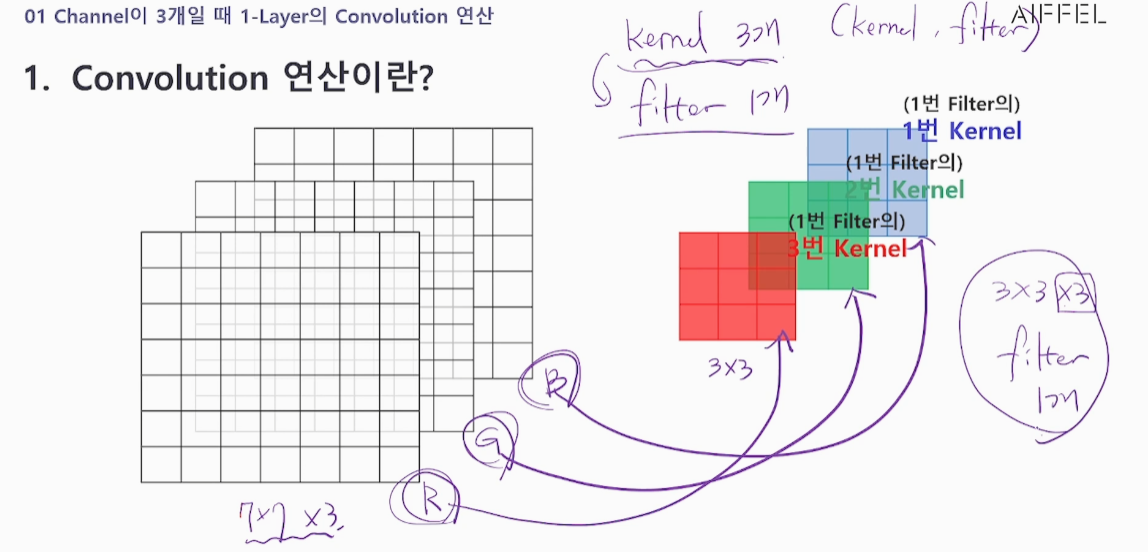
- 3채널 이미지에서 커널 3개가 하나의 필터를 구성!

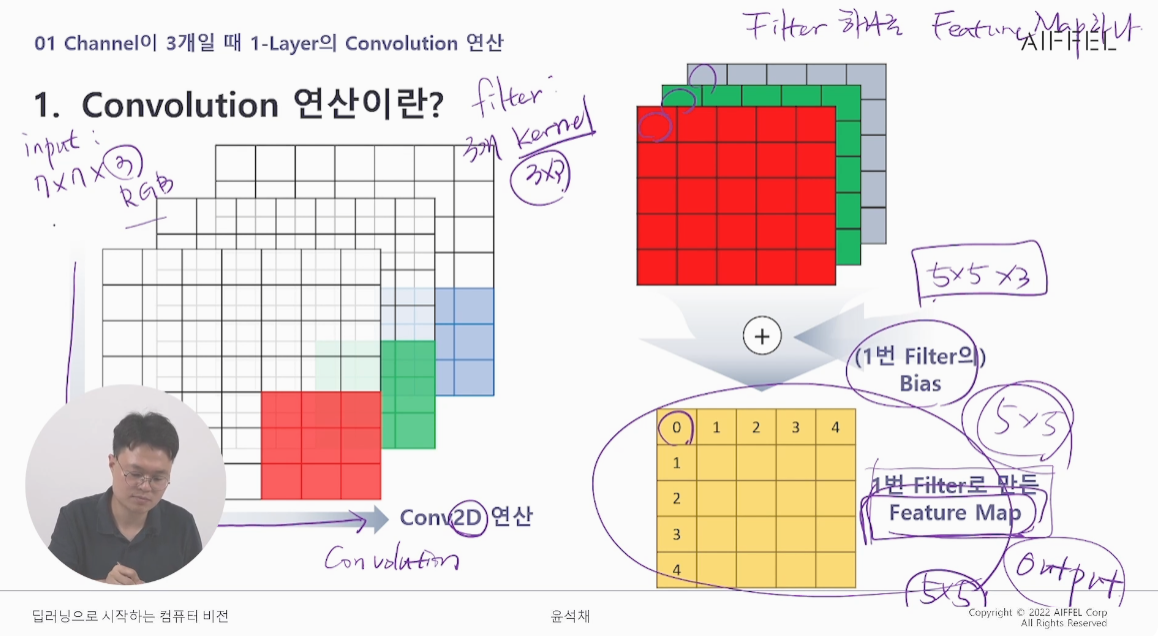


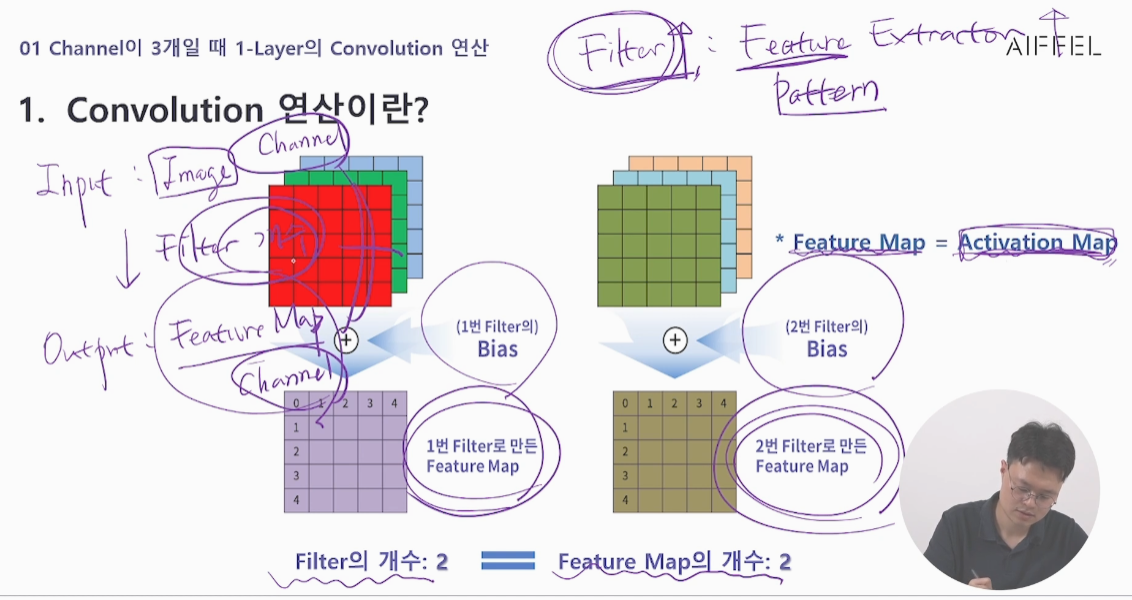
### 복습할 것
- 필터 = Feature(Pattern) Extracter
- 필터 갯수가 많으면 복잡하고 다양한 패턴을 추출할 수 있다.
- 바이어스는 필터당 하나만 존재(채널 갯수와 상관 없음)
- 피처맵의 채널수 = 필터의 갯수
- 이번 레이어의 필터 갯수 = 다음 레이어의 채널수

### 문답
1.  7 x 7 x 3의 input에 3x3의 kernel, stride 1인 Convolution 연산을 하면 output의 크기는 어떻게 되나요? feature map의 크기는 어떻게 되나요?

- output : 5x5x3
- featue map : 5x5

kernel은 input의 channel 수만큼 존재하고, 각 channel 수준에서 Convolution 2D 연산을 계속하면 channel 수만큼의 output이 생깁니다. 따라서 output은 5 x 5 x 3이 나옵니다.

filter 1개로 feature map 1개를 만들 수 있습니다. 3개의 output의 동일한 위치의 숫자를 더하고 거기에 1번 filter의 bias를 더하여 1번 filter의 5 x 5 feature map을 만들 수 있습니다. 즉 “(5 x 5) x 3”개의 칸에 같은 값(bias)이 더해져 feature map을 만듭니다.

2. input의 channel 수, feature map의 channel 수, filter의 개수의 관계에 대해서 설명해 보세요.
- feature map의 채널 수 = fiter의 갯수
- feature map의 채널 수 = 다음 인풋의  channel수

# 4-3. Hyper-Parameter에 대한 고민(Kernel size, Channel size, Stride)

### 중요하므로 찬찬히 읽어 볼 것
Convolution 연산을 할 때, Hyper-Parameter에 대한 고민을 해야 합니다. 이번 스텝에서는 kernel size, channel size, stride에 대해 고민해 봅시다.

### Kernel Size
- Kernel size가 커질수록 연산을 통해 찾아야 하는 파라미터의 수가 증가하게 됩니다.
- Kernel size가 작아질수록 데이터에 존재하는 global feature보다 local feature에 집중하게 됩니다. 쉽게 표현하자면 큼직한 특징보다는 지엽적인 특징에 집중해서 패턴을 찾게 됩니다.

### Channel size
- Filter의 channel size가 커질수록 convolution 연산을 통해서 더 다양한 패턴을 찾을 수 있습니다.
- 그러나 channel의 사이즈가 커짐에 따라서 연산으로 찾아야 하는 파라미터의 숫자가 증가하게 됩니다.

### Stride
- Stride 값이 커지면 데이터를 빠르게 훑고 지나가는 연산을 하게 됩니다.
- 따라서 지역적인 특징을 꼼꼼하게 살펴보아야 할 경우에는 stride값을 크게 하는 것이 좋지 않습니다.

안타깝게도 이러한 hyperparameter의 값을 어떻게 정하는 것이 최적이라는 규칙을 찾는 것은 매우 어려운 일입니다. 따라서 연구자는 시행착오를 스스로의 실습으로 해거나 AutoML과 같은 방법으로 hyperparameter를 스스로 tuning해야 합니다.

> AutoML은 머신러닝과 딥러닝을 적용할 때마다 반복적인 과정으로 발생하는 비효율적인 작업(하이퍼 파라미터 실험, 문제 적합한 architecture를 찾는 과정 등)을 최대한 자동화하여 생산성과 효율을 높이기 위하여 등장한 것으로, 현재 다양한 툴들이 개발되어 있습니다.

일반적으로 해당 task에서 가장 좋은 성능을 보여주는 모델의 hyperparameter를 그대로 따라하는 경우가 많습니다.

### 문답

1. 파라미터와 하이퍼파라미터 모두 매개변수(parameter)이지만, 두 개념은 차이점이 있습니다.

• 파라미터 (Parameter) : 파라미터는 모델 내부에서 학습되는 변수입니다.
예) weight coefficient(가중치 계수), bias(편향치)
• 하이퍼파라미터 (Hyperparameter) : 하이퍼 파라미터는 사용자가 직접 세팅해 주는 값을 말합니다.
예) learning rate, batch size 등

# 4-4. 1x1 Convolution

Convolution 학습을 수행하는 layer를 사용해서 원하는 모델을 구성할 때는 Filter의 Channel 수를 직접 결정해야 합니다. 이전에 언급한 대로, 일반적으로는 좋은 성능을 보이는 논문에서의 구조를 그대로 따라하지만, 때로는 연구자가 직접 결정해주어야 합니다.

channel size가 지나치게 크면 학습을 통해 찾아야 하는 파라미터 숫자가 증가하기 때문에 많은 연산 비용을 들여야만 합니다. 하지만 1x1 Convolution을 사용하면 연산량을 매우 쉽게 줄일 수 있습니다.

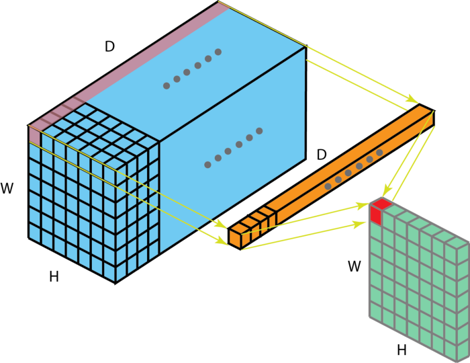
[1x1 convolution]
https://ai.stackexchange.com/questions/13692/when-should-i-use-3d-convolutions

때로는 feature map의 가로 세로 사이즈는 변화시키지 않고 channel size만 변형하고 싶을 때가 있습니다. 물론 padding을 통하여 가로 세로 사이즈에 대한 변경없이 channel size만 변경할 수 있지만 파라미터 숫자 증가에 따른 연산량 증가의 문제를 피할 수 없습니다. 이럴 때 1x1 convolution은 연산량의 문제를 회피하면서도 channel size를 원하는 대로 변경하는 데에 도움을 줍니다.

### 문답

Q. 1x1 Convolution을 사용하면 연산량을 매우 쉽게 줄일 수 있습니다. 계산량이 실제로 줄어드는지 예시 2개를 풀어보고, 두 개의 값을 비교하여 생각해 보세요.

[예시 1] 28x28x192 image 데이터에 (5x5 filter, 32 channel) convolution 연산을 적용한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.
[예시 2] 28x28x192 image 데이터에 (1x1 filter, 16 channel) convolution 연산을 사용하여 channel을 줄인 뒤, 이어서 (5x5 filter, 32 channel) convolution 연산을 적용 한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.

예시 1의 feature map의 크기는 24x24x32가 나옵니다. 파라미터 수(연산량)는 28 x 28 x 32 x 5 x 5 x 192 = 120,422,400 약 1.2억 번의 연산이 필요합니다.

예시 2의 feature map의 크기도 24x24x32가 나옵니다. 먼저, 1x1 filter를 사용해서 크기를 줄일 때 사용되는 파라미터 수(연산량)는 28 x 28 x 16 x 1 x 1 x 192 = 2,408,448 약 240만 번의 연산이 필요합니다. 다시 5x5 filter를 사용하면 28 x 28 x 32 x 5 x 5 x 16 = 10,035,200 약 1000만 번의 연산이 필요합니다. 그럼 총 약 1240만 번의 연산이 필요합니다.

예시 1과 예시 2의 파라미터 수(연산량)는 1.2억 번(12000만 번) 과 1240만 번의 연산으로 10배 가까이 차이 나는 것을 확인할 수 있습니다. 실제로 1x1 convolution은 연산량의 문제를 회피하면서도 channel size를 원하는 대로 변경하는 데에 도움을 줍니다. 직접 수치로 비교하니 더 이해가 잘 되지 않나요? 🤔😉

# 4-5. Transposed Comvolution

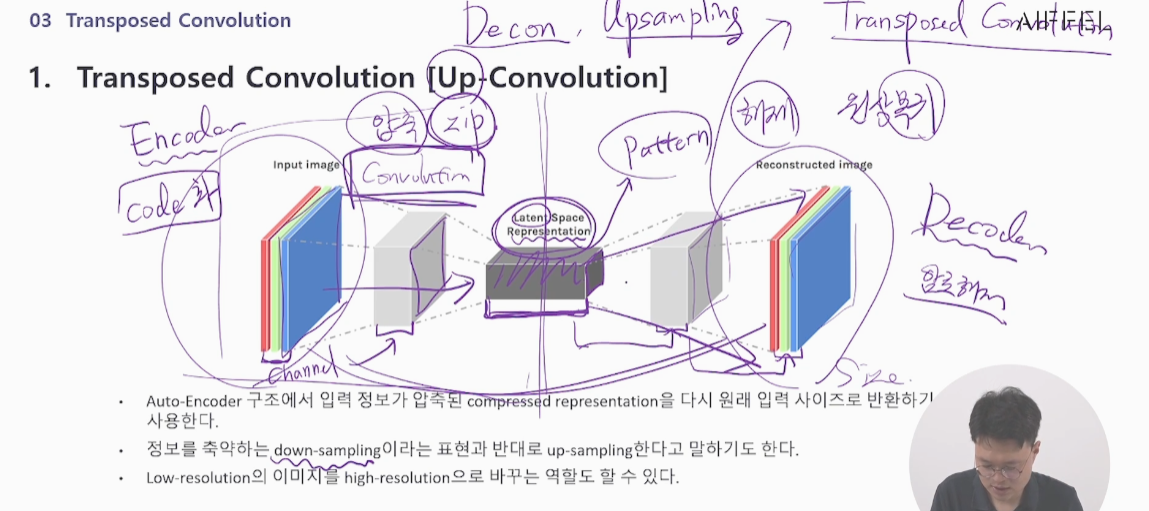

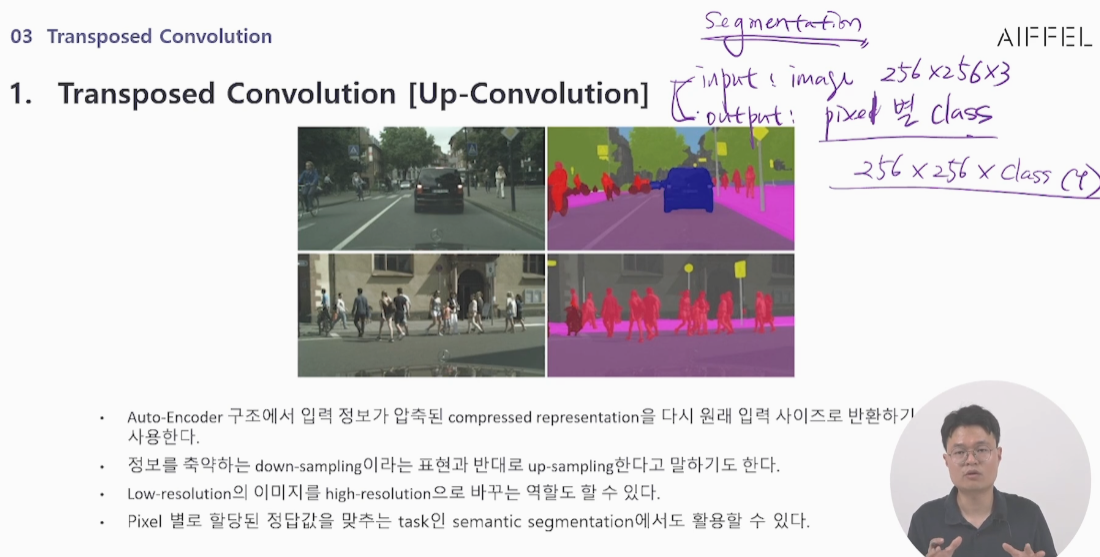

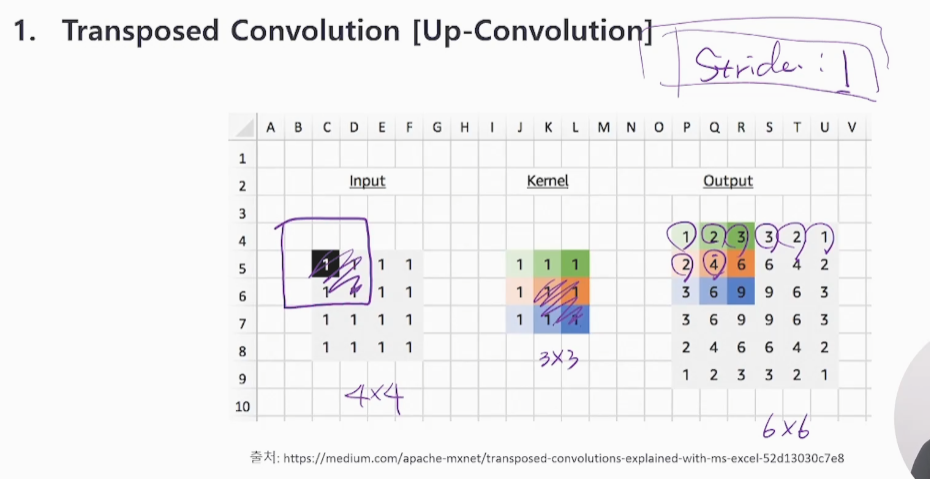

### 문답
#### Q. Transposed Convolution을 사용하는 이유와 특징에 대해서 설명해 보세요.
Transposed Convolution은 Auto-Encoder 구조에서 입력 정보가 압축된 compressed representation을 다시 원래 입력 사이즈로 반환하기 위해 사용합니다. 정보를 축약하는 down-sampling이라는 표현과 반대로 up-sampling 한다고 말하기도 합니다. Low-resolution의 이미지를 high-resolution으로 바꾸는 역할도 할 수 있고, Pixel 별로 할당된 정답 값을 맞추는 task인 semantic segmentation에서도 활용할 수 있습니다.

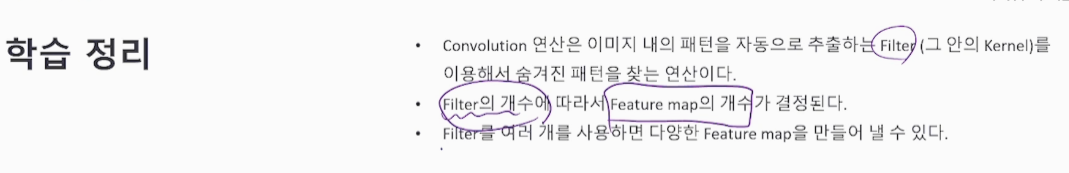

## 문답

### Q. Convolution 연산은 어떤 연산인지 설명해 보세요.

Convolution 연산은 이미지 내의 패턴을 자동으로 추출하는 Filter(그 안의 Kernel)를 이용해서 숨겨진 패턴을 찾는 연산입니다.

